In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# New Section

# New Section

About Dataset

Rising urban populations, aging infrastructure, and inefficient traffic management lead to substantial costs. INRIX reports $305 billion in losses for U.S. commuters in 2017, highlighting the need for innovative traffic solutions.

Content
This dataset contains 48.1k (48120) observations of the number of vehicles each hour in four different junctions:

1) DateTime
2) Juction
3) Vehicles
4) ID

About the data

The sensors on each of these junctions were collecting data at different times, hence you will see traffic data from different time periods. Some of the junctions have provided limited or sparse data requiring thoughtfulness when creating future projections.



In [ ]:
#Loading Data
data = pd.read_csv("./sample_data/traffic.csv")
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
data["DateTime"]= pd.to_datetime(data["DateTime"])
data = data.drop(["ID"], axis=1) #dropping IDs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


Text(0.5, 0, 'Date')

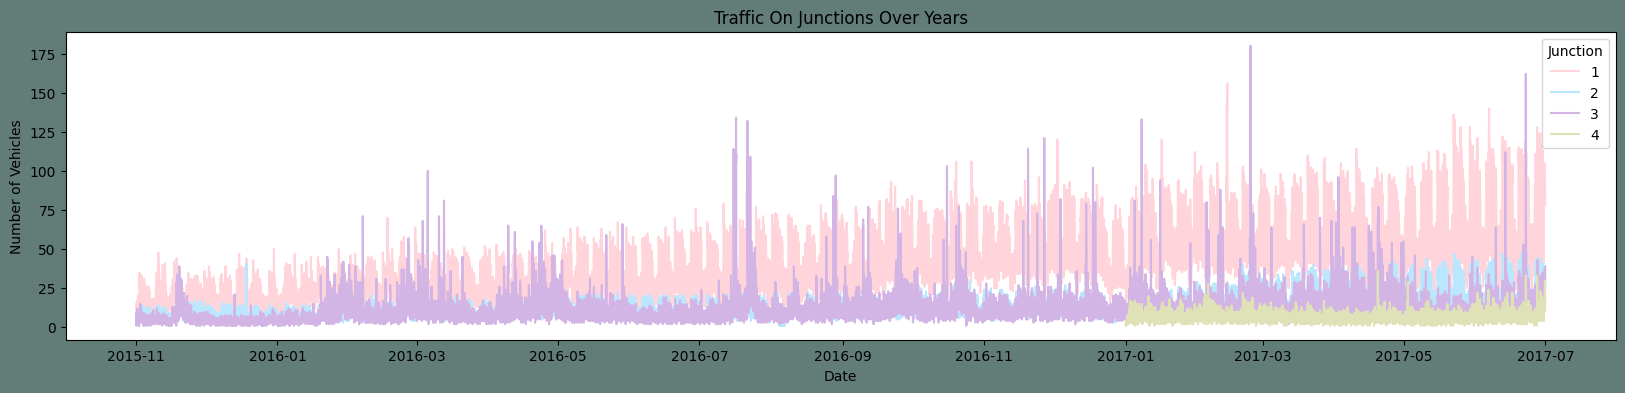

In [ ]:
#Let's plot the Timeseries
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=data['DateTime'],y="Vehicles",data=data, hue="Junction", palette=colors)
Time_series.set_title("Traffic On Junctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

In [ ]:
# Extract year, month, day, hour, and day of the week as features
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Date_no'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Day'] = data['DateTime'].dt.strftime("%A")
data.head()

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


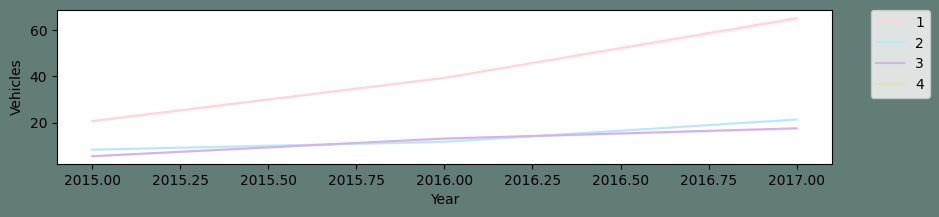

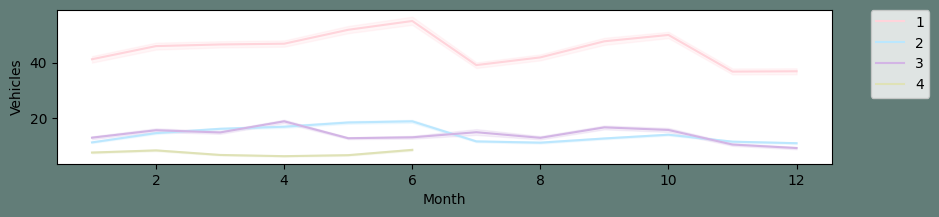

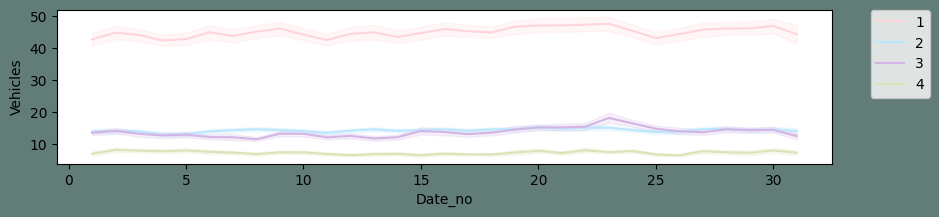

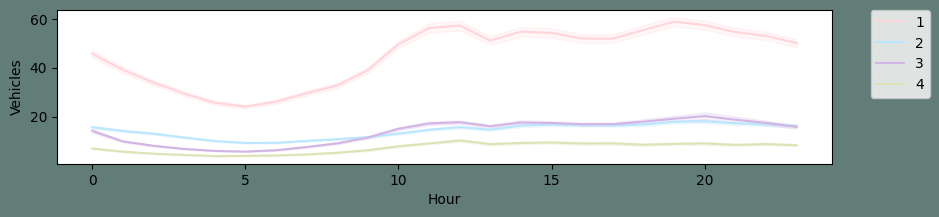

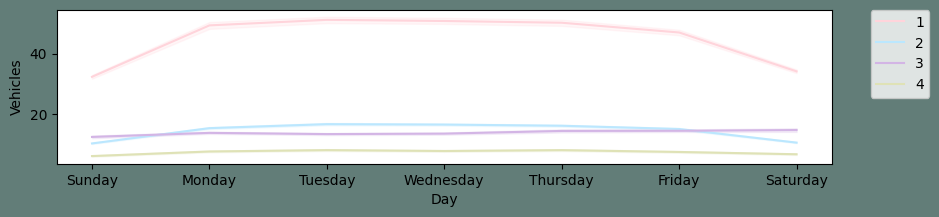

In [ ]:

#Let's plot the Timeseries
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10,2),facecolor="#627D78")
    ax=sns.lineplot(x=data[i],y="Vehicles",data=data, hue="Junction", palette=colors )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Text(0.5, 0, 'Date')

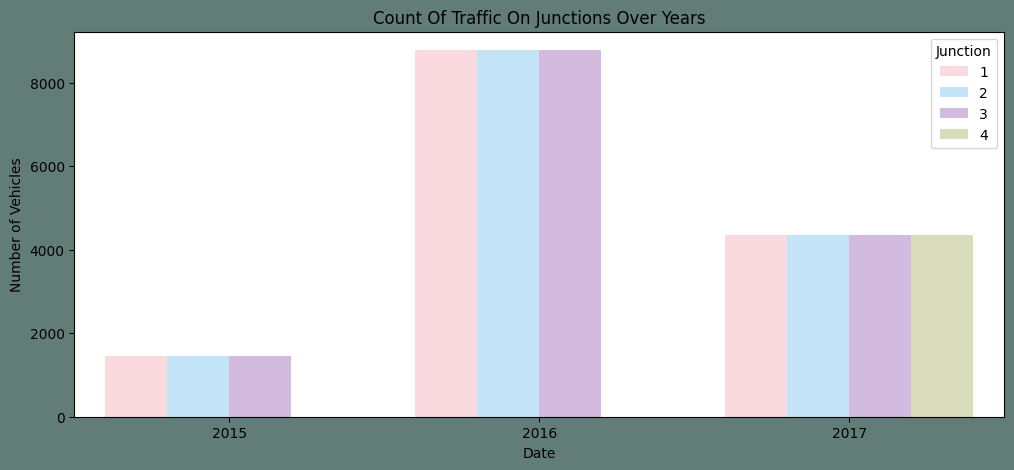

In [ ]:

plt.figure(figsize=(12,5),facecolor="#627D78")
count = sns.countplot(data=data, x =data["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")


<Axes: >

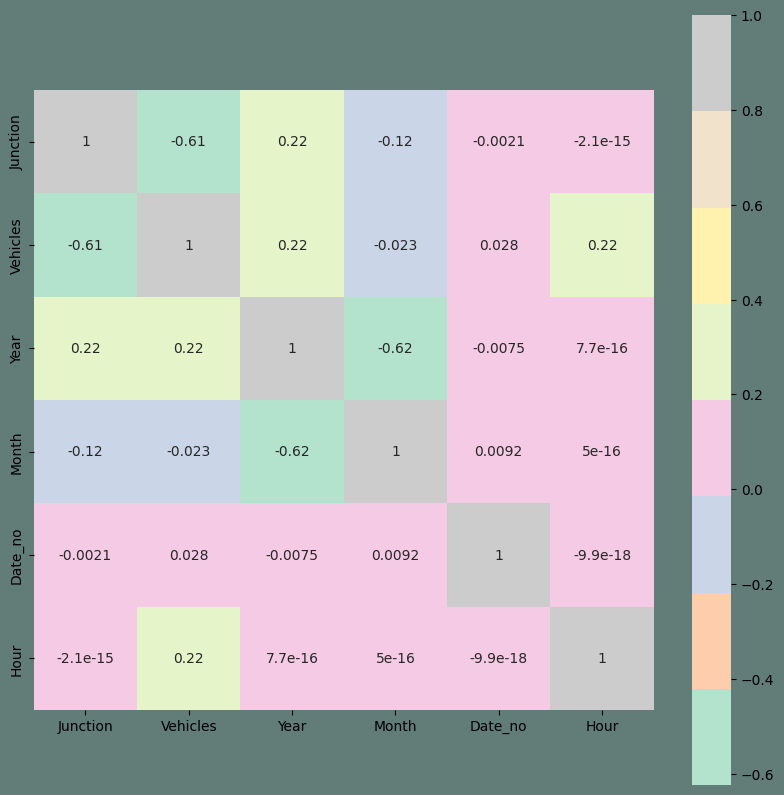

In [ ]:

numeric_df = data.select_dtypes(include=[np.number])  # Select only numeric columns
corrmat = numeric_df.corr()

plt.subplots(figsize=(10,10),facecolor="#627D78")
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True, )


In [ ]:

# One-hot encode the 'Day' column
data = pd.get_dummies(data, columns=['Day'], prefix=['Day'])

# Implement linear regression from scratch
def train_linear_regression(X, y):
    # Add a column of ones to X for the intercept term
    X = np.column_stack((np.ones(X.shape[0]), X))
    # Calculate the coefficients using the normal equation
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    return coefficients

def predict_linear_regression(coefficients, X):
    # Add a column of ones to X for the intercept term
    X = np.column_stack((np.ones(X.shape[0]), X))
    # Make predictions
    y_pred = X @ coefficients
    return y_pred


MSE: 290.4091


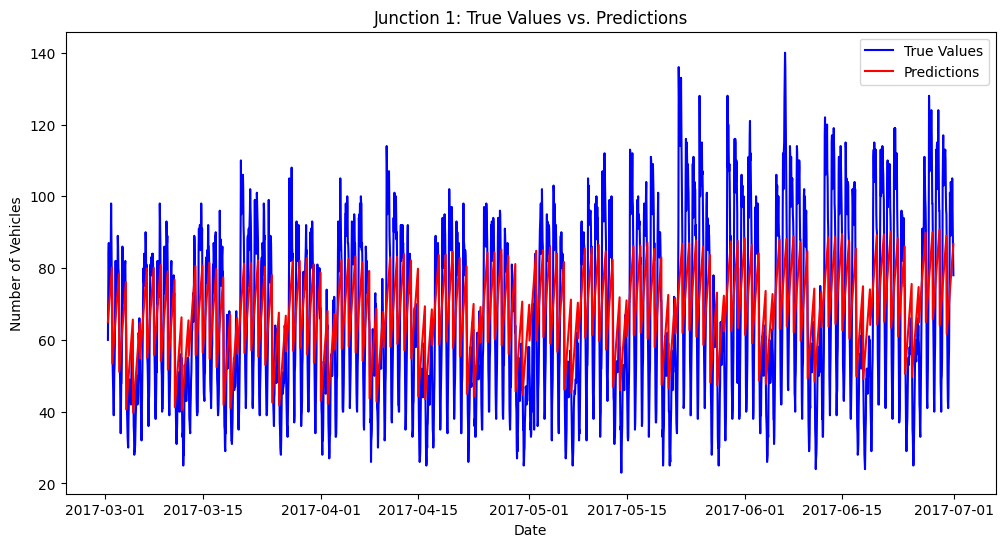

MSE: 82.1262


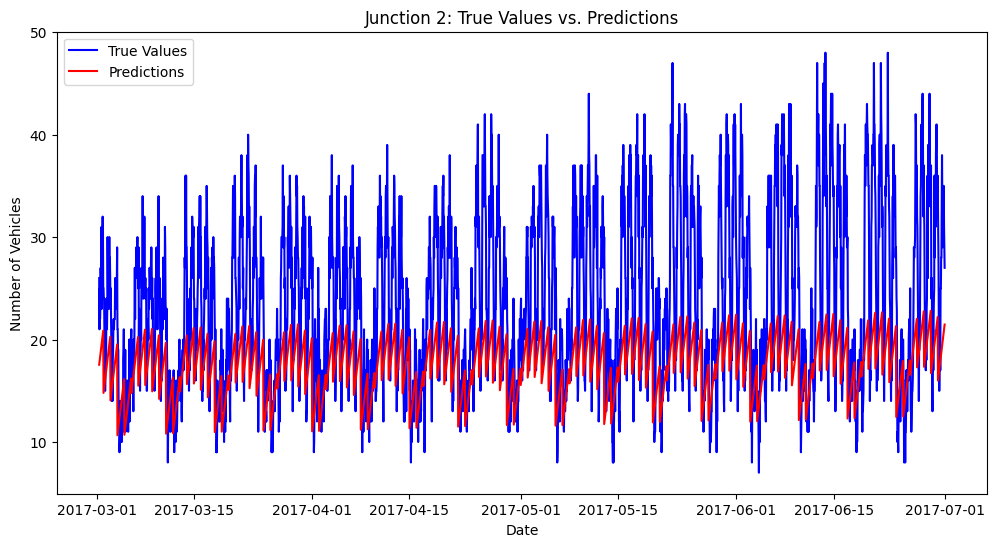

MSE: 92.2264


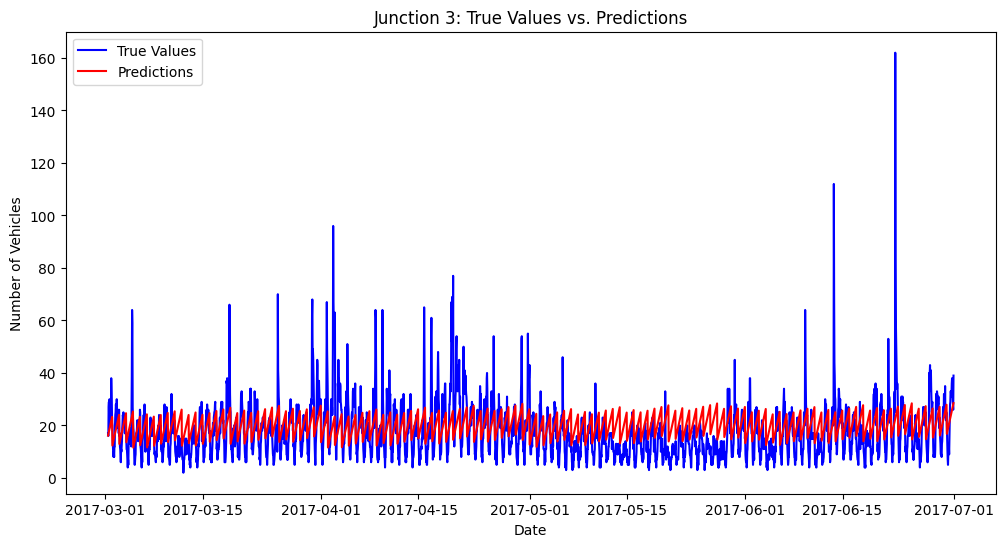

In [ ]:

# Select a junction (replace 1 with your desired junction number)
for junction_number in range(1,4):
    df = data[data['Junction'] == junction_number].copy()

    # Split your data into training and test sets (adjust the split ratio as needed)
    train_size = int(0.8 * len(df))
    train_data, test_data = df[:train_size], df[train_size:]

    # Prepare features and target variables
    X_train = train_data[['Year', 'Month', 'Date_no', 'Hour', 'Day_Monday', 'Day_Tuesday', 'Day_Wednesday', 'Day_Thursday', 'Day_Friday', 'Day_Saturday', 'Day_Sunday']]
    y_train = train_data['Vehicles']
    X_test = test_data[['Year', 'Month', 'Date_no', 'Hour', 'Day_Monday', 'Day_Tuesday', 'Day_Wednesday', 'Day_Thursday', 'Day_Friday', 'Day_Saturday', 'Day_Sunday']]
    y_test = test_data['Vehicles']

    # Scale your input features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the linear regression model
    coefficients = train_linear_regression(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = predict_linear_regression(coefficients, X_test_scaled)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE: {mse:.4f}')

    # Plot predictions vs. true values
    plt.figure(figsize=(12, 6))
    plt.plot(test_data['DateTime'], y_test, label='True Values', color='blue')
    plt.plot(test_data['DateTime'], y_pred, label='Predictions', color='red')
    plt.title(f'Junction {junction_number}: True Values vs. Predictions')
    plt.xlabel('Date')
    plt.ylabel('Number of Vehicles')
    plt.legend()
    plt.show()
